In [1]:
# enter when past 20 candles there are 10 candles' low below bb_l, rsi < 35
# exit at rsi >= 60
# stop loss = enter * 0.99
# start time - 1609492611000, 1641028611000, 1672564611000 (2021, 2022, 2023)


In [2]:
# ! conda install -c conda-forge ta --yes

In [3]:
import requests
import pandas as pd
import pandas_ta as p_ta
import ta
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import time

In [4]:
dataframes = {}
def create_raw(symbol, interval_arr, start_time, end_time, step):
    
    url = "https://api.binance.com/api/v3/klines"
    
    for interval in interval_arr:

        raw_df = pd.DataFrame()
        
        for timestamp in range(start_time, end_time, step):
            params = {"symbol": symbol_C,
                      "interval": interval,
                      "startTime": timestamp,
                      "endTime": timestamp + step}
            response = requests.get(url, params=params).json()
            out = pd.DataFrame(response, columns = ["Open_Time", "Open", "High", "Low", "Close",
                                                   "Volume", "Close_Time", "Quote asset volume",
                                                   "Number of trades", "Taker buy base asset volume",
                                                   "Taker buy quote asset volume", "Ignore"])
            raw_df = pd.concat([raw_df, out], axis = 0)

        raw_df = raw_df[['Open_Time', 'Open', 'Close', "High", "Low", 'Volume']]
        dataframes[f'df_{interval}'] = raw_df

In [5]:
interval_arr = ['1h']
start_time_arr = [1641028611000]
# ema_arr = [100]

In [6]:
timezone = 8
symbol = 'ethusdt'
symbol_C = symbol.upper()
interval = '1h'

start_time = 1641028611000
end_time = round(time.time() * 1000)

# step between timestamps in milliseconds
step = 60000 * 360

In [7]:
loop_start_time = time.time()
create_raw(symbol, interval_arr, min(start_time_arr), end_time, step)
loop_end_time = time.time()
print("Time taken to execute for loop:", loop_end_time - loop_start_time, "seconds")
# print(dataframes)

Time taken to execute for loop: 245.07782626152039 seconds


In [8]:
# create_raw(symbol, interval_arr, min(start_time_arr), end_time, step)

# sample = dataframes[f'df_{interval_arr[0]}']
# sample = sample[['Open_Time', 'Open', 'Close', "High", "Low", 'Volume']].astype(float)

# sample['Open_Time'] = pd.to_datetime(sample['Open_Time'], unit='ms') + pd.Timedelta(hours=timezone)
# sample['Open_Time'] = sample['Open_Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
# print(sample)

In [9]:
def get_klines(symbol, interval, start_time, end_time):
    global dataframes
    df = dataframes[f'df_{interval}']
    df = df[['Open_Time', 'Open', 'Close', "High", "Low", 'Volume']].astype(float)
    df = df.set_index('Open_Time')
#     df = df.reset_index(drop=True)

    df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=timezone)
    df = df[~df.index.duplicated(keep='first')]

    return df

In [10]:
def time_format(timezone):
#     df['Open_Time'] = pd.to_datetime(df['Open_Time'], unit='ms') + pd.Timedelta(hours=timezone)
#     df['Open_Time'] = df['Open_Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=timezone)
    df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

In [11]:
bb_int = 30
bb_dev = 2
rsi_int = 14

In [12]:
df = get_klines(symbol, interval_arr[0], start_time, end_time)
df = df.astype(float).round(2)

# for interval in interval_arr:
#     raw_df = get_klines(symbol, interval, start_time, end_time)
    
#     # ema
#     for ema in ema_arr:
#         column_name = f'ema_{ema}_{interval}'
#         df[column_name] = ta.trend.ema_indicator(raw_df.Close, window=ema)
    
#     # bb
#     bb = ta.volatility.BollingerBands(raw_df.Close, window=bb_int, window_dev=bb_dev)
#     df[f'bb_u_{interval}'] = bb.bollinger_hband()
#     df[f'bb_m_{interval}'] = bb.bollinger_mavg()
#     df[f'bb_l_{interval}'] = bb.bollinger_lband()        

    # rsi
#     rsi = ta.momentum.RSIIndicator(raw_df.Close, window = rsi_int)
#     df[f'rsi_{interval}'] = rsi.rsi()
    
    # atr
#     df['atr'] = ta.volatility.average_true_range(df.High, df.Low, df.Close)
    
# reset index and set current index as a column
df = df.reset_index()

# set new index with integers
df = df.set_index(pd.RangeIndex(len(df)))

# time_format(timezone)
df['Open_Time'] = df['Open_Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df.tail(5))

                 Open_Time     Open    Close     High      Low   Volume
12262  2023-05-27 17:00:00  1828.19  1826.75  1830.18  1826.56  6085.81
12263  2023-05-27 18:00:00  1826.75  1826.54  1828.00  1824.60  5894.64
12264  2023-05-27 19:00:00  1826.54  1826.83  1828.36  1822.45  5291.38
12265  2023-05-27 20:00:00  1826.83  1828.18  1830.40  1824.76  4491.42
12266  2023-05-27 21:00:00  1828.19  1831.21  1832.00  1828.18  2570.37


In [13]:
rsi_up = 60
rsi_low = 35
# kd_dir = 'Up'

In [14]:
# def check_cross(df, kd_dir):
#     up = df['slow_k'] > df['slow_d']
#     down = df['slow_k'] < df['slow_d']
#     if kd_dir == 'Up':
#         return up.diff() & up
#     if kd_dir == 'Any':
#         return up.diff()
#     if kd_dir == 'Down':
#         return down.diff() & down


def indicators(df):

# ema
#     for i in (ema_arr):
#         df['ema_'+str(i)] = ta.trend.ema_indicator(df.Close, window=i)

# bband
    bb_int = 30
    bb_dev = 2
    bb = ta.volatility.BollingerBands(df['Close'], window=bb_int, window_dev=bb_dev)
    df['bb_u'] = bb.bollinger_hband()
    df['bb_m'] = bb.bollinger_mavg()
    df['bb_l'] = bb.bollinger_lband()        
        
# # atr
#     df['atr'] = ta.volatility.average_true_range(df.High, df.Low, df.Close)
    
# rsi
    rsi_int = 14
    df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window = rsi_int).rsi()

# kd
#     kd_int = 14
#     d_int = 3
   
#     kd_df = pd.DataFrame()
#     kd_df[str(kd_int) + '-Low'] = df['Low'].rolling(kd_int).min()
#     kd_df[str(kd_int) + '-High'] = df['High'].rolling(kd_int).max()
#     df['slow_k'] = (df['Close'] - kd_df[str(kd_int) + '-Low'])*100/(kd_df[str(kd_int) + '-High'] - kd_df[str(kd_int) + '-Low'])
#     df['slow_d'] = df['slow_k'].rolling(d_int).mean()
    
# kd cross
#     df['kd_cross'] = check_cross(df, kd_dir)

In [15]:
# indicators(df, kd_dir)
indicators(df)

In [16]:
# df = df.replace('', np.nan)
# df['ema_8_4h'] = df['ema_8_4h'].interpolate()
# df['ema_18_4h'] = df['ema_18_4h'].interpolate()
# df['ema_38_4h'] = df['ema_38_4h'].interpolate()
# df['rsi_1h'] = df['rsi_1h'].interpolate()

In [17]:
def conditions(df):
    
    df['c1'] = False
    for i, row in df.iterrows():
        if i >= 20:
            count = sum(df.loc[i-20:i-1, 'Low'] < df.loc[i-20:i-1, 'bb_l'])
            if count >= 10:
                df.loc[i, 'c1'] = True
        
        df['c2'] = df['rsi'] <= rsi_low

#     for index, row in df.iterrows():            


    # 條件達成
    df['signal'] = False
    df.loc[df.c1 & df.c2, 'signal'] = True

#     print(df)

    # 下一根進場
    df['openbuy'] = False
    for i in range(len(df) - 1):
        if df.loc[i, 'signal'] == True:
            df.loc[i + 1, 'openbuy'] = True
            
    return df

In [18]:
conditions(df)

,Open_Time,Open,Close,High,Low,Volume,bb_u,bb_m,bb_l,rsi,c1,c2,signal,openbuy
0,2022-01-01 18:00:00,3718.67,3691.39,3731.88,3673.46,10412.47,NaN,NaN,NaN,NaN,False,False,False,False
1,2022-01-01 19:00:00,3691.39,3693.37,3712.19,3691.02,4786.22,NaN,NaN,NaN,NaN,False,False,False,False
2,2022-01-01 20:00:00,3693.38,3716.28,3718.24,3693.37,6595.55,NaN,NaN,NaN,NaN,False,False,False,False
3,2022-01-01 21:00:00,3716.28,3710.03,3724.93,3706.32,5715.60,NaN,NaN,NaN,NaN,False,False,False,False
4,2022-01-01 22:00:00,3710.04,3697.61,3713.68,3691.88,5365.45,NaN,NaN,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12262,2023-05-27 17:00:00,1828.19,1826.75,1830.18,1826.56,6085.81,1842.636693,1824.625333,1806.613974,52.127114,False,False,False,False
12263,2023-05-27 18:00:00,1826.75,1826.54,1828.00,1824.60,5894.64,1842.186415,1825.238000,1808.289585,51.808785,False,False,False,False
12264,2023-05-27 19:00:00,1826.54,1826.83,1828.36,1822.45,5291.38,1840.845654,1826.030333,1811.215013,52.242512,False,False,False,False
12265,2023-05-27 20:00:00,1826.83,1828.18,1830.40,1824.76,4491.42,1840.409963,1826.582333,1812.754703,54.304306,False,False,False,False


In [19]:
# sl_atr = 3
# tp_atr = 5

In [20]:
entry_df = conditions(df).copy()

in_position = False
stop_loss = np.nan
take_profit = np.nan
close_val = entry_df['Close']
# atr_val = entry_df[f'atr_{interval_arr[0]}']


for index, row in entry_df.iterrows():

    if index == 0:
        continue
    
    elif entry_df.at[index, 'openbuy'] == True:
   
        entry_df.at[index, 'entry_p'] = close_val.shift(1).at[index]
        entry_df.at[index, 'stop_loss'] = close_val.shift(1).at[index] * 0.995 # - sl_atr * atr_val.shift(1).at[index]
#         entry_df.at[index, 'take_profit'] = close_val.shift(1).at[index] * 1.0025 # + tp_atr * atr_val.shift(1).at[index]
        entry_df.at[index, 'position'] = 'Buy'
        in_position = True
        stop_loss = entry_df.at[index, 'stop_loss']
#         take_profit = entry_df.at[index, 'take_profit']
    

    # 吃筍
    #-----------------------------重要-----------------------------
    # 若用 if 寫，則有可能入場馬上吃筍，若用 elif 則一個 iteration 只會執行一次
    elif in_position == True and (entry_df.at[index, 'Close'] <= stop_loss):
        entry_df.at[index, 'position'] = 'Stop'
        in_position = False
        stop_loss = np.nan
        take_profit = np.nan

    # set take profit
    elif in_position == True and (entry_df.at[index, 'rsi'] >= rsi_up):
        entry_df.at[index, 'position'] = 'Sell'
        in_position = False
        stop_loss = np.nan
#         take_profit = np.nan
        entry_df.at[index, 'take_profit'] = close_val.at[index]
        
entry_df.to_csv('entry_df.csv')
        
raw_entry_df = entry_df.copy()

# 過濾有訊號或事件發生的Ｋ線
entry_df = entry_df[(entry_df['openbuy'] == True) |
              (entry_df['signal'] == True) | 
              (entry_df['position'] == 'Buy') |
              (entry_df['position'] == 'Sell') |
              (entry_df['position'] == 'Stop')]

print(entry_df)

                 Open_Time     Open    Close     High      Low    Volume  \
114    2022-01-06 12:00:00  3448.83  3450.42  3471.07  3406.24  37113.22   
115    2022-01-06 13:00:00  3450.42  3456.98  3480.42  3436.79  22669.56   
116    2022-01-06 14:00:00  3456.97  3438.73  3468.10  3419.94  18913.51   
117    2022-01-06 15:00:00  3438.74  3453.12  3463.39  3426.31  16986.56   
118    2022-01-06 16:00:00  3453.04  3405.22  3456.05  3384.00  34167.78   
...                    ...      ...      ...      ...      ...       ...   
12207  2023-05-25 10:00:00  1777.15  1779.80  1780.66  1774.98   9528.67   
12208  2023-05-25 11:00:00  1779.79  1781.27  1783.09  1775.92  11183.24   
12209  2023-05-25 12:00:00  1781.28  1779.17  1782.41  1774.45  11974.03   
12210  2023-05-25 13:00:00  1779.18  1784.16  1784.49  1778.41   5217.14   
12236  2023-05-26 15:00:00  1811.62  1816.71  1817.72  1809.52  11104.13   

              bb_u         bb_m         bb_l        rsi     c1     c2  signal  \
114   

In [21]:
# 部位回測

pos_df = entry_df.copy()
pos_df = pos_df.reset_index(drop = True)
pos_df = pos_df[(pos_df['position'] == 'Buy') |
              (pos_df['position'] == 'Sell') |
              (pos_df['position'] == 'Stop')]

# 一次進場多少單位
pos_size = 1

col = ['Open_Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'bb_l', 'rsi', 'position','entry_p', 'stop_loss', 'take_profit']
pos = pos_df[col]
pos = pos.reset_index(drop = True)


for index, row in pos.iterrows():
    
    current_pos = 0
    
    # 進場
    if pos.at[index, 'position'] == 'Buy':
        pos.at[index, 'size'] = pos_size
        pos.exit_p = np.nan
    
    # 出場
    if pos.at[index, 'position'] == 'Sell' or pos.at[index, 'position'] == 'Stop':
        
        #-----------------------------重要-----------------------------
        # 實戰需即刻出場
        
        # 停利：達成條件時收盤價
        if pos.at[index, 'position'] == 'Sell':
#             pos.at[index, 'exit_p'] = pos.at[index, 'Close']
            for i in range(index -1, -1, -1):
                if pos.at[i, 'position'] == 'Buy':
                    pos.at[index, 'exit_p'] = pos.at[index, 'take_profit']
                break

        # 停損：打到進場停損點（往回跌代，直到最近的'Buy'及其'stop_loss'）
        if pos.at[index, 'position'] == 'Stop':
            pos.at[index, 'exit_p'] = pos.at[index, 'Close']
#             for i in range(index -1, -1, -1):
#                 if pos.at[i, 'position'] == 'Buy':
#                     pos.at[index, 'exit_p'] = pos.at[i, 'stop_loss']
#                 break

        # 計算每次出場部位大小（每次出場皆清倉）
        for i in range(index -1, -1, -1):
            if pos.at[i, 'position'] == 'Buy':
                current_pos += pos.at[i, 'size']
                if i == 0:
                    pos.at[index, 'size'] = -current_pos
                else:
                    continue
            else:
                pos.at[index, 'size'] = -current_pos
                current_pos = 0
                break


# 計算部位價值
for index, row in pos.iterrows():
    if pos.at[index, 'position'] == 'Buy':
        pos.at[index, 'amt'] = round(pos.at[index, 'size'] * pos.at[index, 'entry_p'], 4)
    elif pos.at[index, 'position'] == 'Sell' or pos.at[index, 'position'] == 'Stop':
        pos.at[index, 'amt'] = round(pos.at[index, 'size'] * pos.at[index, 'exit_p'], 4)


# 若最後一筆為 Buy，移除該單，迭代驗證
for index, row in pos.iloc[::-1].iterrows():
    if row['position'] == 'Buy':
        pos = pos.drop(index)
    else:
        break


# 手續費、滑點、價差
fee = 0.05 / 100
amt_abs_sum = pos.amt.abs().sum()
ttl_fee = amt_abs_sum * fee


# 損益
leverage = 10
ttl_profit = -pos.amt.sum() - ttl_fee


# 計算獲利/虧損次數
agg_amts = []

for i in range(len(pos) - 1, -1, -1):

    if pos.loc[i, 'position'] in ['Stop', 'Sell']:
        
        # look out for the + sign
        total_amt = pos.loc[i, 'amt'] + np.absolute(pos.loc[i, 'amt']) * fee
        
        # iterate backwards from the current row until reaching another 'Stop' or 'Sell'
        # watch out for the + in total_amt += trading_fee
        j = i - 1
        while j >= 0 and pos.loc[j, 'position'] not in ['Stop', 'Sell']:
            total_amt += pos.loc[j, 'amt']
            trading_fee = np.absolute(pos.loc[j, 'amt']) * fee
            total_amt += trading_fee
            j -= 1
        
        # add the aggregated amount to the list
        agg_amts.append(total_amt)

agg_amts.reverse()


# 計算進場最大部位，最大損益
consec_entry = 0
position_amt_sum = 0
max_consec_entry = 0
max_position = 0
max_profit = 0
max_loss = 0

for index, row in pos.iterrows():
    
    if row['position'] == 'Buy':
        
        consec_entry += 1
        position_amt_sum += row['amt']
        
    elif row['position'] in ['Sell', 'Stop']:
        
        if consec_entry > max_consec_entry:
            max_consec_entry = consec_entry
            max_position = position_amt_sum
            
        position_amt_sum += row['amt']
        
        if -position_amt_sum > max_profit:
            max_profit = -position_amt_sum
            
        if -position_amt_sum < max_loss:
            max_loss = -position_amt_sum
            
        consec_entry = 0
        position_amt_sum = 0
    
    else:
        pass

# 最大部位
profit_per = "{:.2f}%".format(ttl_profit / (max_position/leverage) * 100)


# 勝率
wins = 0
loses = 0

for trade in agg_amts:
    if trade < 0:
        wins += 1
    elif trade > 0:
        loses += 1

win_rate = "{:.2f}%".format(wins / (wins + loses) * 100)


# 結果
result = {'Profit': [round(ttl_profit, 2)],
          'Fee': [round(ttl_fee, 2)],
          'Max_Profit': [round(max_profit, 2)],
          'Max_Loss': [round(max_loss, 2)],
          'Max_Entry': [max_consec_entry],
          'Max_Position': [round(max_position, 2)],
          'Profit_%': [profit_per],
          'Win_Rate': [win_rate]}


result_df = pd.DataFrame(result)

print(result_df)
print()
print(pos)

pos.to_csv('pos.csv')


   Profit    Fee  Max_Profit  Max_Loss  Max_Entry  Max_Position Profit_%  \
0  1751.1  693.8     1592.23  -1574.65         20      30461.59   57.49%   

  Win_Rate  
0   42.62%  

               Open_Time     Open    Close     High      Low    Volume  \
0    2022-01-06 13:00:00  3450.42  3456.98  3480.42  3436.79  22669.56   
1    2022-01-06 14:00:00  3456.97  3438.73  3468.10  3419.94  18913.51   
2    2022-01-06 15:00:00  3438.74  3453.12  3463.39  3426.31  16986.56   
3    2022-01-06 16:00:00  3453.04  3405.22  3456.05  3384.00  34167.78   
4    2022-01-06 17:00:00  3405.56  3308.44  3408.37  3300.00  58231.38   
..                   ...      ...      ...      ...      ...       ...   
425  2023-05-25 10:00:00  1777.15  1779.80  1780.66  1774.98   9528.67   
426  2023-05-25 11:00:00  1779.79  1781.27  1783.09  1775.92  11183.24   
427  2023-05-25 12:00:00  1781.28  1779.17  1782.41  1774.45  11974.03   
428  2023-05-25 13:00:00  1779.18  1784.16  1784.49  1778.41   5217.14   
429  2

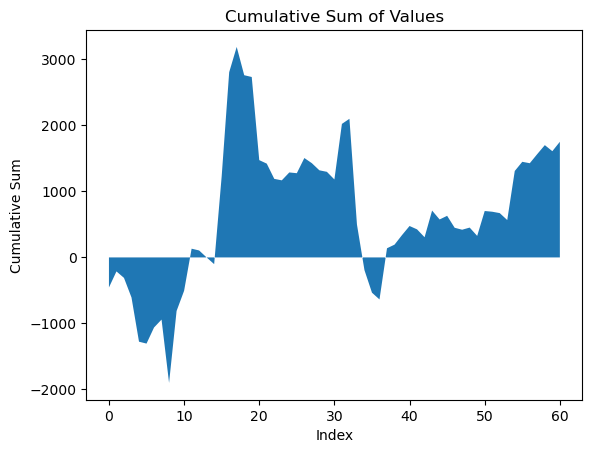

[-454.87267999999625, -211.99004999999661, -309.89266999999455, -606.4375249999878, -1276.3265349999922, -1304.882984999993, -1061.1689849999932, -941.1765549999932, -1900.5401299999958, -810.9218299999955, -505.16773999999594, 132.12507500000703, 105.52917500000703, -0.582069999993081, -101.61539999999175, 1227.0547800000074, 2805.186085000005, 3187.896070000005, 2759.367975000003, 2732.4499900000023, 1473.454590000005, 1420.419840000005, 1189.6405600000046, 1167.3975000000048, 1286.8941800000048, 1275.5271300000047, 1505.2563300000045, 1427.2076050000048, 1319.4004300000047, 1296.2426200000045, 1180.681080000005, 2022.2436900000055, 2099.374980000005, 498.66213500001095, -192.658859999985, -534.1616099999849, -636.4705499999855, 138.69606500001498, 193.327865000015, 338.71649000001423, 475.87146500001404, 424.86981500001406, 305.59017500001323, 709.4953850000147, 574.8818700000127, 630.0012750000121, 449.21269500001245, 419.55329000001217, 451.8282450000121, 326.00395500000946, 702.9

In [22]:
cumulative_values = []
cumulative_sum = 0
for value in agg_amts:
    cumulative_sum -= value
    cumulative_values.append(cumulative_sum)

plt.fill_between(range(len(cumulative_values)), cumulative_values, 0)

plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of Values')

plt.show()

print(cumulative_values)

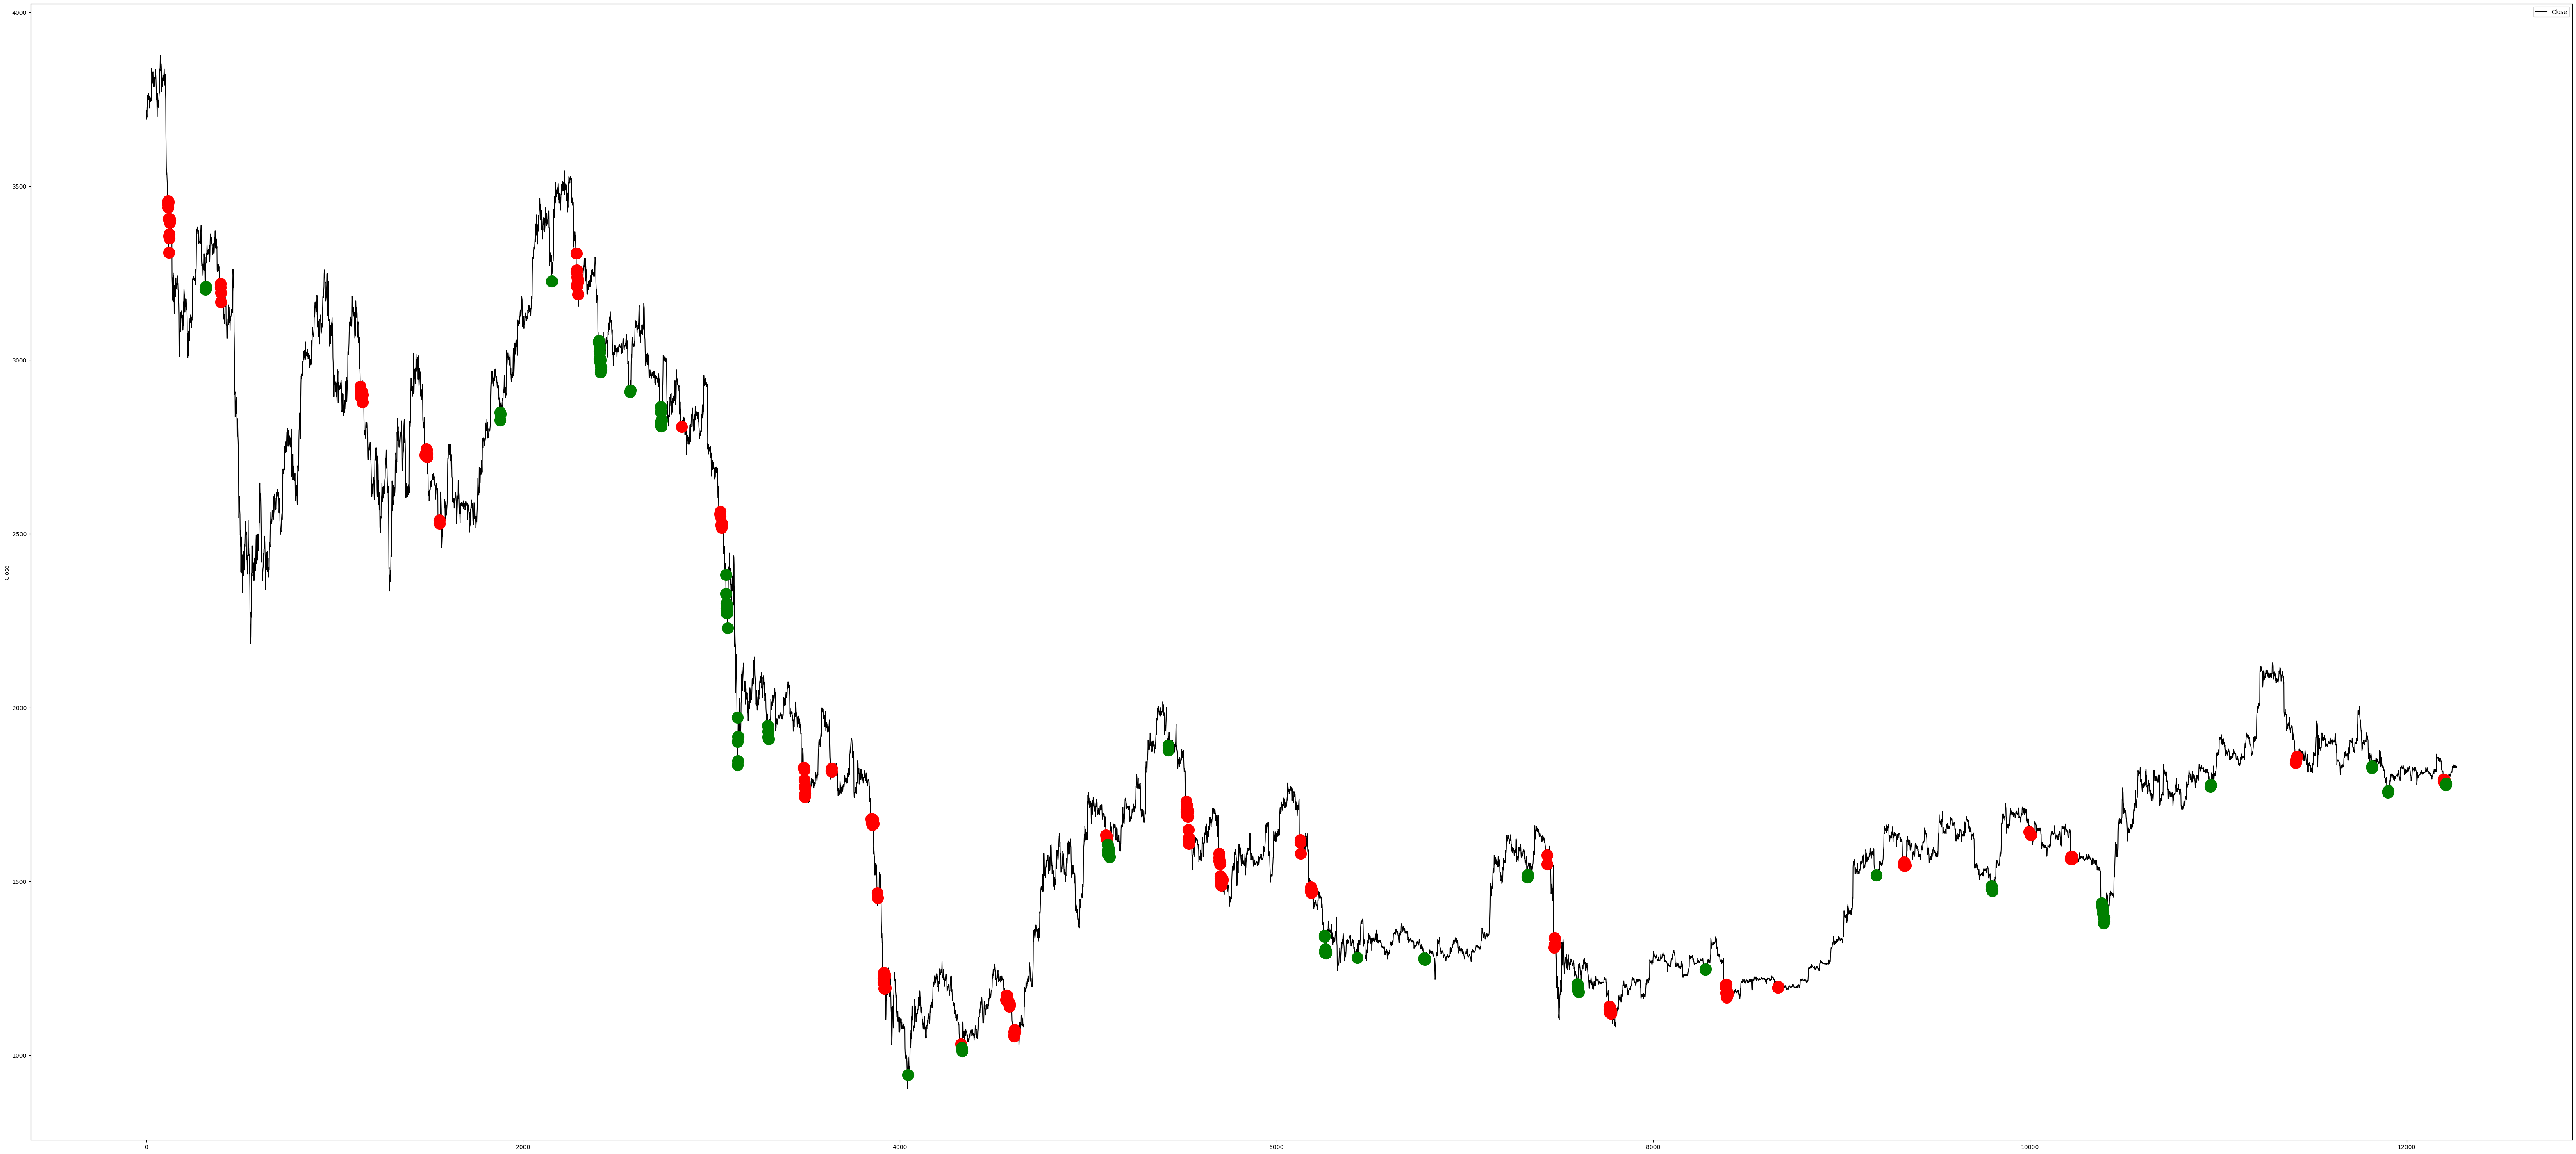

In [23]:
plt_df = raw_entry_df.copy()

plt.figure(figsize=(80, 36))
plt.ylabel('Close')
plt.plot(plt_df.Close, label = 'Close', c ='black')

i = 0
while i < len(plt_df):
    if pd.isna(plt_df.position[i]):
        i += 1
    elif plt_df.position[i] == 'Buy':
        j = i + 1
        while j < len(plt_df) and (pd.isna(plt_df.position[j]) or plt_df.position[j] == 'Buy'):
            j += 1
        if j < len(plt_df) and plt_df.position[j] == 'Sell':
            # Paint all previous 'Buy's green dot
            for k in range(i, j+1):
                plt.plot(k, plt_df.entry_p[k], 'go', label='_', markersize=20)
            i = j
        elif j < len(plt_df) and plt_df.position[j] == 'Stop':
            # Paint all previous 'Buy's red dot
            for k in range(i, j+1):
                plt.plot(k, plt_df.entry_p[k], 'ro', label='_', markersize=20)
            i = j + 1
        else:
            i = j
    else:
        i += 1

plt.legend()
plt.show()


# 之所以出現大量紅點，原因為：連續加倉會調整整個部位停利和停損，因此一些進倉部位會因為調高後的＂整個部位＂停損而出場，但該入場損益依舊為正
# 意思是該部位之停損已經高於許多前面部位之進場點位